**Tag:**

Statistic analysis

**Background description:**

The Carlson Department Store suffered heavy damage when a hurricane struck on August 31. The store was closed for four months (September through December), and Carlson is now involved in a dispute with its insurance company about the amount of lost sales during the time the store was closed.

Two key issues must be resolved: (1) the amount of sales Carlson would have made if the hurricane had not struck, and (2) whether Carlson is entitled to an additional compensation for excess sales due to increased business activity after the storm.

File hurricane.csv gives Carlson's sales data for the 48 months preceding the storm. It also reports the total sales for the 48 months preceding the storm for all department stores in the county, as well as the total sales in the county for the four months the Carlson Department Store was closed. All sales in millions.

The target of this project is (1) to analyze the data and develop estimates of the lost sales at the Carlson Department Store from Sep 2016 to Dec 2016. We also needs (2) to determine whether a case can be made for excess storm-related sales during the same period. If such a case can be made, Carlson is entitled to compensation for excess sales it would have earned in addition to ordinary sales.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Data preparation and cleaning

In [2]:
data=pd.read_csv('hurricane.csv')
data

,Month,Year,Store,County
0,January,2012,NaN,NaN
1,February,2012,NaN,NaN
2,March,2012,NaN,NaN
3,April,2012,NaN,NaN
4,May,2012,NaN,NaN
5,June,2012,NaN,NaN
6,July,2012,NaN,NaN
7,August,2012,NaN,NaN
8,September,2012,1.71,55.8
9,October,2012,1.90,56.4


In [3]:
#The first eight rows have null values，so I drop them first and then get the clean datasets "data".
data=data[8:]
data

,Month,Year,Store,County
8,September,2012,1.71,55.8
9,October,2012,1.90,56.4
10,November,2012,2.74,71.4
11,December,2012,4.20,117.6
12,January,2013,1.45,46.8
13,February,2013,1.80,48.0
14,March,2013,2.03,60.0
15,April,2013,1.99,57.6
16,May,2013,2.32,61.8
17,June,2013,2.20,58.2


In [4]:
data.dtypes

Month      object
Year        int64
Store     float64
County    float64
dtype: object

# Modeling

### 1. Fit a regression model (Month as categorical, no interactions) to estimate the loss of regular sales (had there been no hurricane) for Carlson Department Store from Sep 2016 to Dec 2016.

In [5]:
data2=data[:-4]
data2

,Month,Year,Store,County
8,September,2012,1.71,55.8
9,October,2012,1.90,56.4
10,November,2012,2.74,71.4
11,December,2012,4.20,117.6
12,January,2013,1.45,46.8
13,February,2013,1.80,48.0
14,March,2013,2.03,60.0
15,April,2013,1.99,57.6
16,May,2013,2.32,61.8
17,June,2013,2.20,58.2


In [6]:
m1=smf.ols(formula='Store~Year+C(Month)',data=data2).fit()
m1.params

Intercept               -266.312500
C(Month)[T.August]         0.055000
C(Month)[T.December]       2.033333
C(Month)[T.February]      -0.297500
C(Month)[T.January]       -0.130000
C(Month)[T.July]          -0.010000
C(Month)[T.June]          -0.005000
C(Month)[T.March]          0.002500
C(Month)[T.May]            0.215000
C(Month)[T.November]       0.620833
C(Month)[T.October]        0.060833
C(Month)[T.September]     -0.256667
Year                       0.133333
dtype: float64

In [7]:
store_predict=m1.predict(data)
data['store_predict']=store_predict
demand=data.tail(4)
demand

C:\Users\surface\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Month,Year,Store,County,store_predict
56,September,2016,NaN,69.0,2.230833
57,October,2016,NaN,75.0,2.548333
58,November,2016,NaN,85.2,3.108333
59,December,2016,NaN,121.8,4.520833


In [8]:
demand['store_predict'].sum()

12.408333333328752

Estimated loss of regular sales for Carlson Department Store is 12.41 million dollars.

C:\Users\surface\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\surface\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\surface\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

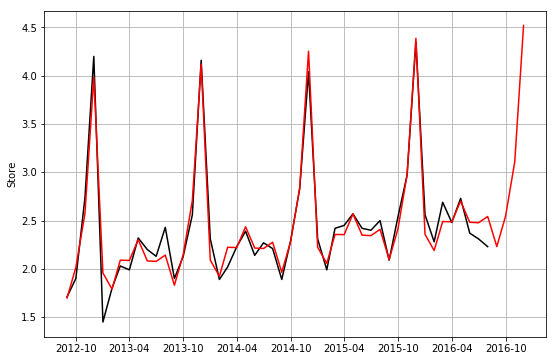

In [18]:
import matplotlib.pyplot as plt
data2['Year']=data2['Year'].astype(str)
data2['Date']=pd.to_datetime(data2['Year']+data2['Month'],format='%Y%B')
data['Year']=data['Year'].astype(str)
data['Date']=pd.to_datetime(data['Year']+data['Month'],format='%Y%B')
plt.figure(figsize=(9,6))
plt.plot(data2.Date,data2.Store,color='k')
plt.plot(data.Date,data.store_predict,color='r')
plt.xlabel('')
plt.ylabel('Store')
plt.grid()

### 2. Split the data into two sets (set 1: 2012 to Aug 2016, and set 2: from Sep 2016 to Dec 2016). Use data set 1 to fitt a model for the county sales. Use this model to predict the county sales from Sep 2016 to Dec 2016.

In [10]:
data['Year']=pd.to_numeric(data['Year'])
data2['Year']=pd.to_numeric(data2['Year'])
set1=data[:-4]
set2=data[-4:]
m2=smf.ols(formula='County~Year+C(Month)',data=set1).fit()
set2['county_predict']=m2.predict(set2)
set2

C:\Users\surface\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\surface\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\surface\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,Month,Year,Store,County,store_predict,Date,county_predict
56,September,2016,NaN,69.0,2.230833,2016-09-01,49.8875
57,October,2016,NaN,75.0,2.548333,2016-10-01,51.9875
58,November,2016,NaN,85.2,3.108333,2016-11-01,66.2375
59,December,2016,NaN,121.8,4.520833,2016-12-01,105.6875


### Compare the monthly predictions from 2 with the actual county sales from Sep 2016 to Dec 2016. Find monthly ratios of actual vs. predicted county sales. Ratios larger than 1.0 indicate that actual sales were larger than regular sales, most likely, due to hurricane properties damages.

In [11]:
ratios=set2['County']/set2['county_predict']
ratios

56    1.383112
57    1.442654
58    1.286280
59    1.152454
dtype: float64

The ratios for each month is larger than 1.

### Multiply these ratios by the extimated store sales from 1. These quantities are the monthly total sales (regular and hurricane induced) lost by Carlson Store. The sum of them are the amount that Carlson can demand from the insurance company.

In [12]:
set2['store_predict']=set2['store_predict']*ratios
set2

C:\Users\surface\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Month,Year,Store,County,store_predict,Date,county_predict
56,September,2016,NaN,69.0,3.085492,2016-09-01,49.8875
57,October,2016,NaN,75.0,3.676365,2016-10-01,51.9875
58,November,2016,NaN,85.2,3.998188,2016-11-01,66.2375
59,December,2016,NaN,121.8,5.210053,2016-12-01,105.6875


In [13]:
set2['store_predict'].sum()

15.9700984288724

Carlson can demand 15.97 million dollars from the insurance company.

# Another approach

### 1. Use data set 1 to compute the fraction of Carlson monthly sales to the county-wide department stores monthly sales. This is Carlson's market share. Build a regression model to predict Carlson's market share from Sep 2016 to Dec 2016.

In [14]:
data2['market_share']=data2['Store']/data2['County']
data2

C:\Users\surface\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Month,Year,Store,County,Date,market_share
8,September,2012,1.71,55.8,2012-09-01,0.030645
9,October,2012,1.90,56.4,2012-10-01,0.033688
10,November,2012,2.74,71.4,2012-11-01,0.038375
11,December,2012,4.20,117.6,2012-12-01,0.035714
12,January,2013,1.45,46.8,2013-01-01,0.030983
13,February,2013,1.80,48.0,2013-02-01,0.037500
14,March,2013,2.03,60.0,2013-03-01,0.033833
15,April,2013,1.99,57.6,2013-04-01,0.034549
16,May,2013,2.32,61.8,2013-05-01,0.037540
17,June,2013,2.20,58.2,2013-06-01,0.037801


In [15]:
m3=smf.ols(formula='market_share~Year+C(Month)',data=data2).fit()
predict3=m3.predict(set2)
set2['market_share_predict']=predict3
set2[['Month','Year','market_share_predict']]

C:\Users\surface\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Month,Year,market_share_predict
56,September,2016,0.043939
57,October,2016,0.048029
58,November,2016,0.047847
59,December,2016,0.046326


### 2. Multiply Carlson's predicted market shares by the actual county department store sales month by month. These are the monthly total sales (regular and hurricane induced) lost by Carlson Store. The sum of them are the amount that Carlson can demand from the insurance company.

In [16]:
set2['new_store_predict']=set2['County']*set2['market_share_predict']
set2[['Month','Year','new_store_predict']]

C:\Users\surface\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Month,Year,new_store_predict
56,September,2016,3.031775
57,October,2016,3.602180
58,November,2016,4.076529
59,December,2016,5.642558


In [17]:
set2['new_store_predict'].sum()

16.353041384068977

Carlson can demand 16.35 million dollars.